In [34]:
import numpy as np
import joblib
import os, yaml, sys

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from dim_redu_anns.utils import get_relevant_output_layers, get_layer_out_shape
from pref_viewing.utils import plot_imgs
from alignment.utils import get_usual_transform
from parallel.parallel_funcs import print_wise
from torchvision.models.feature_extraction import (
    create_feature_extractor,
    get_graph_node_names,
)
from torchvision.transforms import ToPILImage
from PIL import Image
from torchvision import models
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from alignment.utils import get_usual_transform, get_transform_to_show
from experiments.utils import convert_to_save
from pref_viewing.utils import get_extreme_k
from datetime import datetime
import torch
from experiments.images_sampling import save_imgs_PCs, save_imgs_CCs, save_imgs_random, save_imgs_kmeans
from experiments.utils import project_onto_PCs, project_onto_CCs, map_on_savenames,get_k_imgs
import pandas as pd

In [35]:
transform = get_usual_transform()
dataset = datasets.ImageFolder(f"{paths["data_path"]}/imagenet/val", transform=transform)

dataset_to_show = datasets.ImageFolder(f"{paths["data_path"]}/imagenet/val", transform=get_transform_to_show())

In [20]:
model_name1, model_name2 = "resnet50", "vit_b_16"
layer_name1, layer_name2 = "layer3.1.relu_2", "encoder.layers.encoder_layer_4.add_1"
test_model = "alexnet"
test_layer = "features.7"
n_imgs = 300
neurons_perc = 20

#pooling = "PC_pool"
#d1, d2 = project_onto_CCs(model_name1, model_name2, target_layer1, target_layer2, pooling, 100, paths)

In [21]:
kmeans_path_aligned = f"{paths['results_path']}/sampling_comparisons/kmeans_CCs_{model_name1}+{model_name2}_{layer_name1}+{layer_name2}_test_{test_model}_{test_layer}_{n_imgs}_samples_{neurons_perc}perc_neurons.pkl"
samples_aligned = joblib.load(kmeans_path_aligned)['sample_imgs']

In [22]:
random_path_aligned = f"{paths['results_path']}/sampling_comparisons/random_CCs_{model_name1}+{model_name2}_{layer_name1}+{layer_name2}_test_{test_model}_{test_layer}_{n_imgs}_samples_{neurons_perc}perc_neurons.pkl"
random_samples = joblib.load(random_path_aligned)['sample_imgs']

In [23]:
kmeans_path1 = f"{paths['results_path']}/sampling_comparisons/kmeans_PCs_{model_name1}_{layer_name1}_test_{test_model}_{test_layer}_{n_imgs}_samples_{neurons_perc}perc_neurons.pkl"
samples_mod1 = joblib.load(kmeans_path1)['sample_imgs']

In [24]:
kmeans_path2 = f"{paths['results_path']}/sampling_comparisons/kmeans_PCs_{model_name2}_{layer_name2}_test_{test_model}_{test_layer}_{n_imgs}_samples_{neurons_perc}perc_neurons.pkl"
samples_mod2 = joblib.load(kmeans_path2)['sample_imgs']

In [25]:
save_imgs_kmeans(samples_mod1, model_name1, layer_name1, dataset_to_show, paths, aligned = False, model_name2=None, layer_name2=None)
save_imgs_kmeans(samples_mod2, model_name2, layer_name2, dataset_to_show, paths, aligned = False, model_name2=None, layer_name2=None)
save_imgs_kmeans(samples_aligned, model_name1, layer_name1, dataset_to_show, paths, aligned = True, model_name2=model_name2, layer_name2=layer_name2)
save_imgs_random(random_samples, model_name1, model_name2, layer_name1, layer_name2, dataset_to_show, paths)

/Volumes/PonceLab/Stimuli/2025_diverseset/kmeans_ResNet50_layer31relu_2_300imgs/kmeans_net_ResNet50_layer_layer31relu_2_0.png
/Volumes/PonceLab/Stimuli/2025_diverseset/kmeans_ResNet50_layer31relu_2_300imgs/kmeans_net_ResNet50_layer_layer31relu_2_1.png
/Volumes/PonceLab/Stimuli/2025_diverseset/kmeans_ResNet50_layer31relu_2_300imgs/kmeans_net_ResNet50_layer_layer31relu_2_2.png
/Volumes/PonceLab/Stimuli/2025_diverseset/kmeans_ResNet50_layer31relu_2_300imgs/kmeans_net_ResNet50_layer_layer31relu_2_3.png
/Volumes/PonceLab/Stimuli/2025_diverseset/kmeans_ResNet50_layer31relu_2_300imgs/kmeans_net_ResNet50_layer_layer31relu_2_4.png
/Volumes/PonceLab/Stimuli/2025_diverseset/kmeans_ResNet50_layer31relu_2_300imgs/kmeans_net_ResNet50_layer_layer31relu_2_5.png
/Volumes/PonceLab/Stimuli/2025_diverseset/kmeans_ResNet50_layer31relu_2_300imgs/kmeans_net_ResNet50_layer_layer31relu_2_6.png
/Volumes/PonceLab/Stimuli/2025_diverseset/kmeans_ResNet50_layer31relu_2_300imgs/kmeans_net_ResNet50_layer_layer31relu_

In [27]:
d = 1
k = 10
t = []
kmeans_imgs_mod1 = [dataset_to_show[i][0].permute(1,2,0) for i in samples_mod1]
kmeans_imgs_mod2 = [dataset_to_show[i][0].permute(1,2,0) for i in samples_mod2]
kmeans_imgs_aligned = [dataset_to_show[i][0].permute(1,2,0) for i in samples_aligned]
random_imgs = [dataset_to_show[i][0].permute(1,2,0) for i in random_samples]

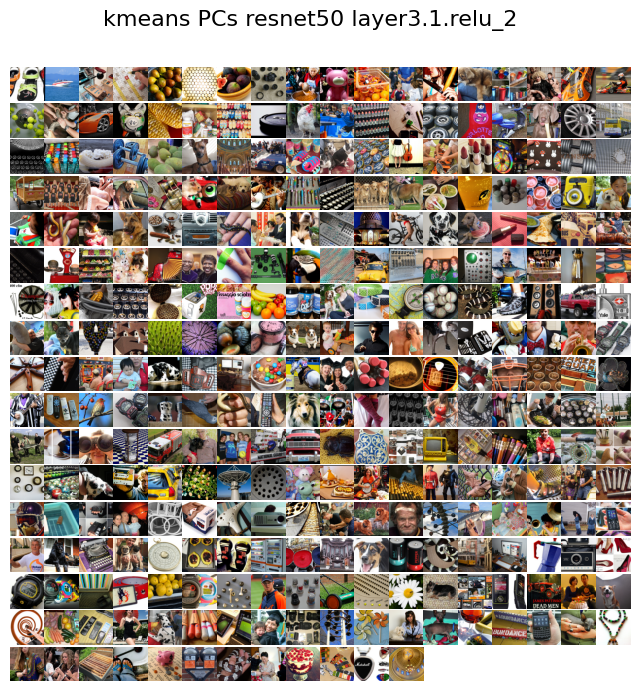

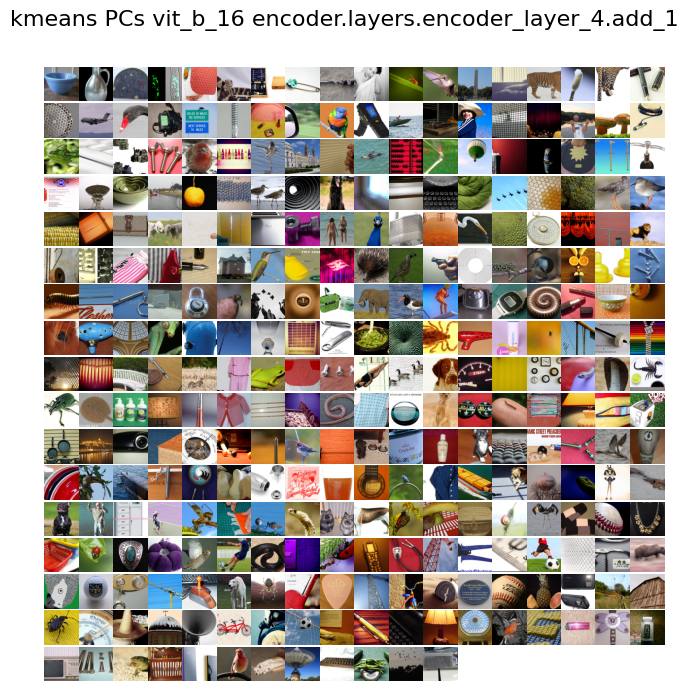

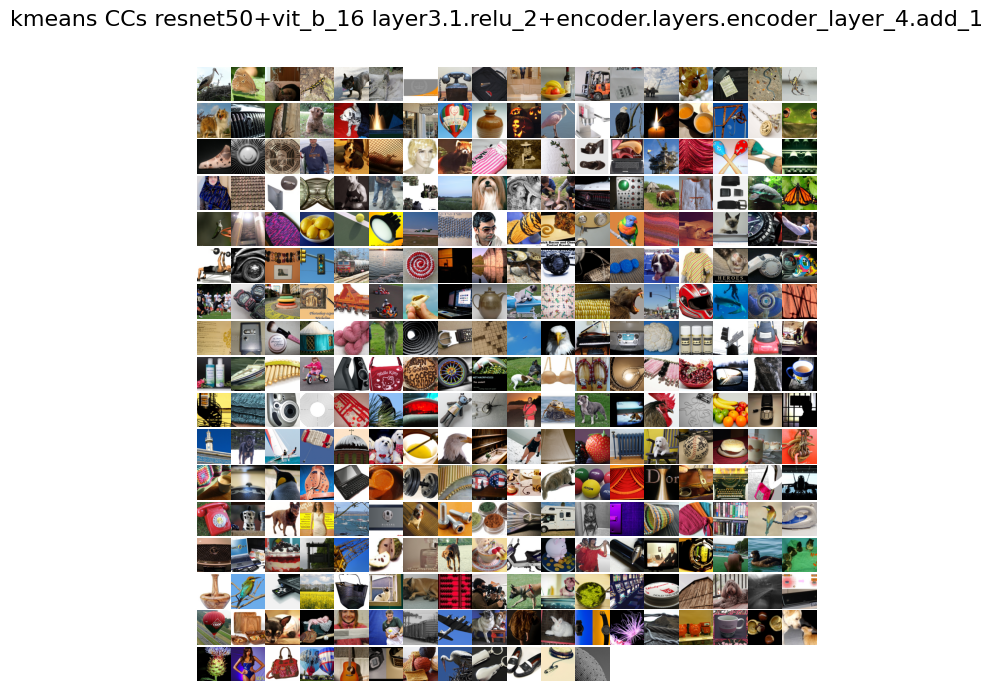

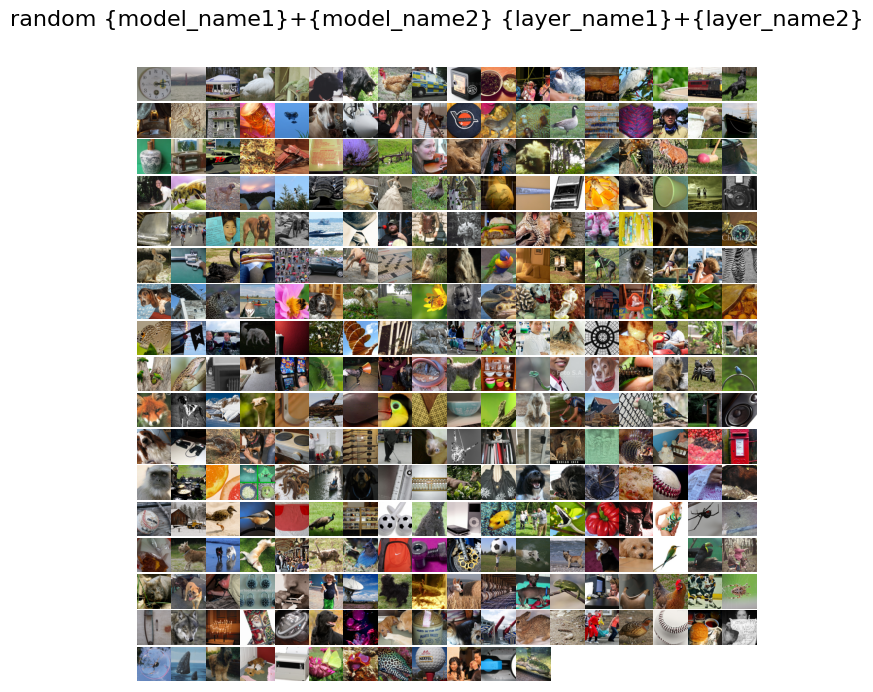

In [30]:
mod_1_plot = plot_imgs(kmeans_imgs_mod1, title=f"kmeans PCs {model_name1} {layer_name1}", square_size = 8)
mod_2_plot = plot_imgs(kmeans_imgs_mod2, title=f"kmeans PCs {model_name2} {layer_name2}", square_size = 8)
mod_aligned_plot = plot_imgs(kmeans_imgs_aligned, title=f"kmeans CCs {model_name1}+{model_name2} {layer_name1}+{layer_name2}", square_size = 8)
random_samples_plot = plot_imgs(random_imgs, "random {model_name1}+{model_name2} {layer_name1}+{layer_name2}", square_size = 8)

In [31]:
path2figs = "/Users/tizianocausin/Desktop/backUp20240609/summer2025/ponce_lab/exp_set/figs"
mod_1_plot.savefig(f"{path2figs}/kmeans_PCs_{model_name1}_{layer_name1}_test_{test_model}_{test_layer}_{n_imgs}_samples_{neurons_perc}perc_neurons.png")
mod_2_plot.savefig(f"{path2figs}/kmeans_PCs_{model_name2}_{layer_name2}_test_{test_model}_{test_layer}_{n_imgs}_samples_{neurons_perc}perc_neurons.png")
mod_aligned_plot.savefig(f"{path2figs}/kmeans_CCs_{model_name1}+{model_name2}_{layer_name1}+{layer_name2}_test_{test_model}_{test_layer}_{n_imgs}_samples_{neurons_perc}perc_neurons.png")
random_samples_plot.savefig(f"{path2figs}/random_CCs_{model_name1}+{model_name2}_{layer_name1}+{layer_name2}_test_{test_model}_{test_layer}_{n_imgs}_samples_{neurons_perc}perc_neurons.png")



